# Melanoma Detection using Custom CNN

## Data Reading/Data Understanding

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define paths
data_dir = r"C:\Users\800649\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration"
train_dir = os.path.join(data_dir, "Train")
test_dir = os.path.join(data_dir, "Test")

# List class names
class_names = os.listdir(train_dir)
print("Classes:", class_names)


Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Dataset Creation

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_HEIGHT = 180
IMG_WIDTH = 180
BATCH_SIZE = 32

# Training data generator
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    subset='validation'
)


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


## Dataset Visualization

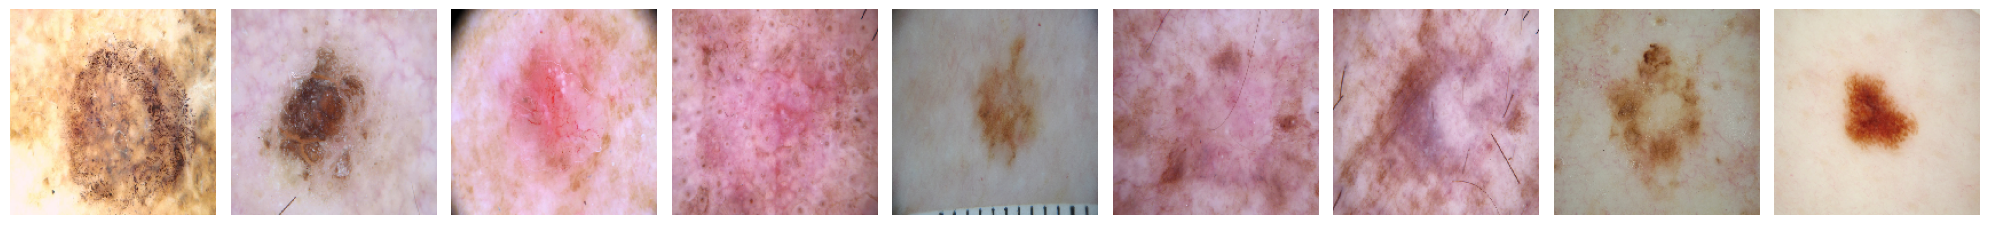

In [4]:
import matplotlib.pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_data_gen)
plot_images(sample_training_images[:9])


## Model Building & Training

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE,
    epochs=20
)


C:\Users\800649\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\800649\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.2040 - loss: 2.5987 - val_accuracy: 0.3077 - val_loss: 1.9040
Epoch 2/20
 1/56 ━━━━━━━━━━━━━━━━━━━━ 18s 329ms/step - accuracy: 0.3333 - loss: 1.3457

C:\Users\800649\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.3333 - loss: 1.3457 - val_accuracy: 0.2404 - val_loss: 2.0219
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 960ms/step - accuracy: 0.3382 - loss: 1.8081 - val_accuracy: 0.4183 - val_loss: 1.8214
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.5312 - loss: 1.4444 - val_accuracy: 0.3413 - val_loss: 1.9126
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 664ms/step - accuracy: 0.3905 - loss: 1.7522 - val_accuracy: 0.4231 - val_loss: 1.7030
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.4375 - loss: 1.5867 - val_accuracy: 0.4135 - val_loss: 1.7160
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 689ms/step - accuracy: 0.4301 - loss: 1.6493 - val_accuracy: 0.3558 - val_loss: 1.8571
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.3125 - loss: 1.5436 - val_accuracy: 0.4519 - val_loss: 1.6215
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 697ms/step - accuracy: 0.4755 - loss: 1.5096 - val_accuracy: 0.4591 -

## Data Augmentation

In [6]:
# Data augmentation
augmented_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data_gen_aug = augmented_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    subset='training'
)

val_data_gen_aug = augmented_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    subset='validation'
)


Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


## Model Building & Training on Augmented Data

In [ ]:
# Train the model on augmented data
history_aug = model.fit(
    train_data_gen_aug,
    steps_per_epoch=train_data_gen_aug.samples // BATCH_SIZE,
    validation_data=val_data_gen_aug,
    validation_steps=val_data_gen_aug.samples // BATCH_SIZE,
    epochs=20
)


## Class Distribution Analysis

In [ ]:
# Analyze class distribution
class_counts = train_data_gen.classes
class_counts = pd.Series(class_counts).value_counts()
print(class_counts)


## Handling Class Imbalances

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import numpy as np

# Load images and labels
def load_images_and_labels(directory):
    images = []
    labels = []
    for label, class_name in enumerate(os.listdir(directory)):
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_and_labels(train_dir)

# Balance the dataset
ros = RandomOverSampler(random_state=42)
train_images_balanced, train_labels_balanced = ros.fit_resample(train_images.reshape((-1, IMG_HEIGHT*IMG_WIDTH*3)), train_labels)
train_images_balanced = train_images_balanced.reshape((-1, IMG_HEIGHT, IMG_WIDTH, 3))
print(Counter(train_labels_balanced))


## Model Building & Training on Rectified Class Imbalance Data

In [ ]:
# Create a balanced dataset generator
balanced_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen_balanced = balanced_image_generator.flow(
    train_images_balanced,
    train_labels_balanced,
    batch_size=BATCH_SIZE
)

# Train the model on balanced data
history_balanced = model.fit(
    train_data_gen_balanced,
    steps_per_epoch=len(train_images_balanced) // BATCH_SIZE,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE,
    epochs=30
)


## Findings and Conclusion


- Document the findings after each model fit.
- Discuss any evidence of overfitting or underfitting.
- Explain the impact of data augmentation and class imbalance handling on the model’s performance.
